<a href="https://colab.research.google.com/github/jellyontherock/machine-learning/blob/master/20220401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터의 형태를 확인
# 모델을 만들어 학습시켜 보세요.
# tf.keras.fashion_mnist

'''
Fashion MNIST 데이터셋 불러오기

Fashion MNIST 데이터셋 살펴보기

Fashion MNIST 데이터셋 전처리하기

모델 구성하기

모델 컴파일하기

모델 훈련하기

모델의 정확도 평가하기

예측하기

뉴런의 개수의 영향

콜백 (Callback) 사용하기

Fashion MNIST 이미지 인식 예제
'''

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
'''
train_images는 0에서 255 사이의 값을 갖는 28x28 크기의 NumPy 어레이를 갖는 어레이이고,

train_labels는 0에서 9까지의 정수 값을 갖는 어레이입니다.

0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블입니다. 각각의 레이블과 클래스는 아래와 같습니다.

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot
'''

In [ ]:
print(train_images.shape) # 28*28, 60,000개의 어레이
print(train_labels.shape)
print(test_images.shape) #28*28 10,000개의 어레이
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# 2. 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#0에서 255 사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환합니다.

In [ ]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

'''

MNIST 인식 예제와 같이 Sequential() 클래스를 이용해서 신경망 모델을 순서대로 구성합니다.

tf.keras.layers.Flatten 클래스는 아래 그림과 같이 입력 데이터를 1차원으로 변환합니다.


'''

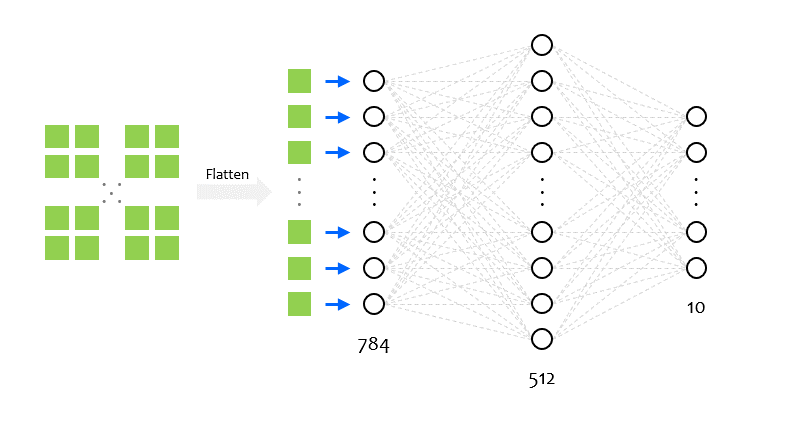

In [ ]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

손실 함수 (loss function)는 훈련 과정에서 모델의 오차를 측정하는데 사용됩니다.

옵티마이저 (optimizer)는 데이터와 손실 함수를 바탕으로 모델 (의 웨이트와 바이어스)을 업데이트하는 방식을 말합니다.

지표 (metrics)는 훈련과 테스트 단계를 평가하기 위해 사용됩니다.

‘accuracy’로 설정하면, 이미지를 올바르게 분류한 비율로 모델을 평가합니다.



In [ ]:
# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4736 - accuracy: 0.8308
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3615 - accuracy: 0.8675
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3209 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2992 - accuracy: 0.8892
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2801 - accuracy: 0.8960


In [ ]:
# 6. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8701
0.35812684893608093 0.8701000213623047


5회의 epoch 학습을 통해 10,000개의 테스트 이미지를 87% 정확도로 분류할 수 있음을 의미합니다. 

In [ ]:
# 7. 예측하기
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

[1.1738395e-05 2.0718993e-07 7.3759551e-08 4.1232115e-09 6.3983532e-07
 8.9337723e-03 1.6668919e-06 3.8819935e-02 7.5518146e-06 9.5222437e-01]
9


predictions는 각 test_images에 대한 신경망의 출력값을 나타내는 어레이입니다.

첫번째 예측 predictions[0]을 출력해보면 10개의 값을 갖는 어레이이며, 입력 이미지 데이터가 열 개의 숫자 중 어떤 숫자일 확률을 의미합니다.

np.argmax() 함수를 이용해서 가장 높은 값을 갖는 인덱스를 확인해보면 9를 출력합니다.
**즉, 학습된 신경망은 이 이미지가 ankle boot라고 예측합니다.**

# 뉴런의 개수의 영향
가운데 뉴런층의 뉴런 노드의 개수를 조절하면 훈련에 어떤 영향을 미치는지 알아봅니다.

아래 그림과 같이 뉴런 노드의 개수를 128, 512, 1024로 변화시키면서 세 가지 경우에 대해

훈련 과정의 손실과 정확도를 확인해보겠습니다.

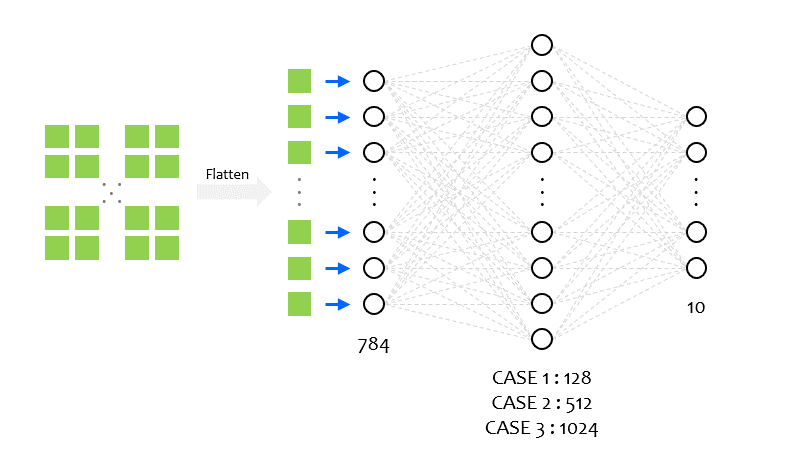

In [ ]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),      ## CASE 1
    # tf.keras.layers.Dense(512, activation='relu'),    ## CASE 2
    # tf.keras.layers.Dense(1024, activation='relu'),   ## CASE 3
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
'''
아까 내용과 비교

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

case 1, 2, 3 에 따른 차이 비교 (128, 512, 1024가 바로 뉴런 노드의 개수)
'''

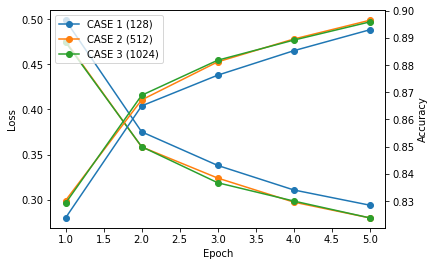

뉴런 노드의 **개수가 증가하면 훈련 과정에서 손실 값이 감소하고 테스트 정확도는 증가하는 경향**이 있습니다.

하지만 계산과 최적화를 필요로 하는 파라미터의 숫자가 증가하기 때문에 ** 훈련에 걸리는 시간은 증가** 합니다.

512개와 1024개에서 손실과 정확도의 증가가 크지 않은 이유는 Fashion MNIST 분류 문제가 비교적 간단한 문제이기 때문입니다.

따라서 **문제에 맞게 적절한 개수의 뉴런을 사용하면서 짧은 훈련 시간 동안 높은 정확도를 얻는 것이 좋습니다.**



# 콜백 (Callback) 사용하기
tf.keras.callbacks 모듈의 Callback 클래스를 사용하면,

훈련 중에 손실 값이 특정 기준 미만이 되었을 때 훈련을 중단할 수 있습니다.

In [ ]:
'''
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if logs.get('loss') < 0.3:
          print('\n훈련을 중지합니다.')
          self.model.stop_training = True

callbacks = myCallback()

# 1. Fashion MNIST 데이터셋 임포트
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 2. 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])
'''

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if logs.get('loss') < 0.3:
          print('\n훈련을 중지합니다.')
          self.model.stop_training = True

#손실 값 (loss)이 0.3 미만이라면 훈련을 중단

In [ ]:
# 전체 예제

import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.vis_utils import plot_model

# 1. Fashion MNIST 데이터셋 임포트
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

from sklearn.model_selection import StratifiedShuffleSplit    
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1004)

for train, cv in split.split(train_images,train_labels):
  X_train=train_images[train]
  X_cv=train_images[cv]
  y_train=train_labels[train]
  y_cv=train_labels[cv]
  
print(sum(y_train==1)==sum(y_cv==1)*4)

#https://reminder-by-kwan.tistory.com/118

# 2. 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0


# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )


# 5. 모델 훈련
history = model.fit(train_images, train_labels, epochs=5, validation_data=(X_cv, y_cv))


# 6. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)


# 7. 예측하기
predictions = model.predict(test_images)
print(predictions[0]) 
print(np.argmax(predictions[0]))

True
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4723 - accuracy: 0.8300 - val_loss: 80.9195 - val_accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3600 - accuracy: 0.8679 - val_loss: 41.2880 - val_accuracy: 0.8791
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3228 - accuracy: 0.8809 - val_loss: 42.1629 - val_accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2999 - accuracy: 0.8897 - val_loss: 40.1423 - val_accuracy: 0.8819
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8787
0.3313341736793518 0.8787000179290771
[2.0210135e-07 2.7443754e-08 3.7488704e-08 2.8766058e-09 6.6376493e-10
 2.7019772e-04 7.7428746e-07 2.2574697e-02 4.3523219e-06 9.7714978e-01]
9


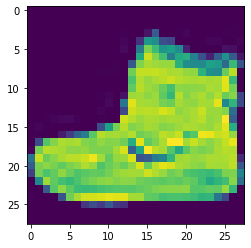

In [ ]:
plt.imshow(train_images[0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
p_test = model.predict(test_images).argmax(axis = 1)

In [ ]:
miss_id = np.where(p_test != test_labels)[0]

Text(0.5, 1.0, 'true:0, predict:8')

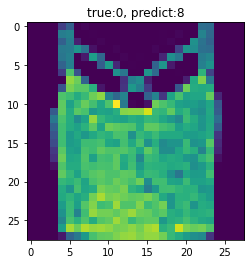

In [ ]:
i = np.random.choice(miss_id)
plt.imshow(test_images[i])
plt.title(f"true:{test_labels[i]}, predict:{p_test[i]}")

In [ ]:
'''
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

'''

In [ ]:
# 5. 모델 훈련
history =  model.fit(train_images, train_labels, epochs=10, validation_data=(X_cv, y_cv))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9011 - val_loss: 38.4039 - val_accuracy: 0.8892
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2516 - accuracy: 0.9059 - val_loss: 29.8855 - val_accuracy: 0.9110
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2429 - accuracy: 0.9097 - val_loss: 52.4374 - val_accuracy: 0.8699
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2307 - accuracy: 0.9141 - val_loss: 35.1737 - val_accuracy: 0.8972
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2221 - accuracy: 0.9166 - val_loss: 42.7457 - val_accuracy: 0.8942
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2133 - accuracy: 0.9198 - val_loss: 28.2621 - val_accuracy: 0.9142
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2058 - accuracy: 0.9222 - val_loss: 33.6627 - val_ac

In [ ]:
p_test = model.predict(test_images).argmax(axis = 1)
miss_id = np.where(p_test != test_labels)[0]


Text(0.5, 1.0, 'true:0, predict:4')

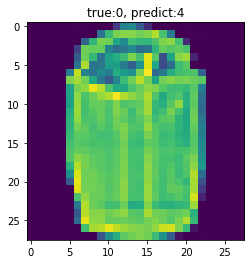

In [ ]:
i = np.random.choice(miss_id)
plt.imshow(test_images[i])
plt.title(f"true:{test_labels[i]}, predict:{p_test[i]}")

In [ ]:
'''
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

'''

In [ ]:
# 테스트 셋으로 모델 평가
score = model.evaluate(test_images, test_labels, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.873199999332428


In [ ]:
model.predict(test_images)

array([[4.2798732e-08, 9.9805746e-09, 7.6553066e-09, ..., 1.7399654e-02,
        1.2029706e-09, 9.8149788e-01],
       [3.1118500e-06, 6.9963623e-12, 9.9991608e-01, ..., 1.8926250e-14,
        7.1719859e-11, 1.6505384e-13],
       [1.5391382e-08, 1.0000000e+00, 7.4366025e-12, ..., 3.4211860e-24,
        7.5415214e-15, 7.0555992e-18],
       ...,
       [1.5365025e-04, 3.3919079e-09, 4.3532866e-05, ..., 2.3669681e-08,
        9.9937809e-01, 9.7571484e-10],
       [1.1896713e-06, 9.9997973e-01, 1.1738090e-08, ..., 1.1566872e-15,
        4.3500922e-10, 1.6302792e-11],
       [6.7540146e-05, 1.2287469e-06, 2.6487167e-05, ..., 4.2134686e-03,
        4.7990245e-05, 7.7098994e-05]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


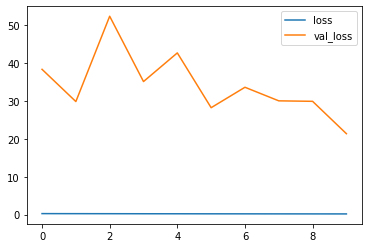

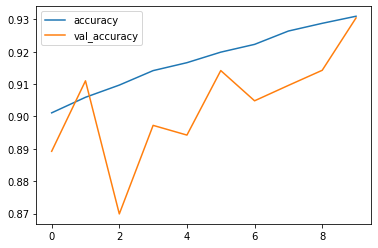

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
train_images=train_images[...,np.newaxis]
print(train_images.shape)

(60000, 28, 28, 1)


In [ ]:
print(train_labels.shape)

(60000,)
